In [14]:
import pandas as pd

player_data_kbo = pd.read_csv("kbo_yearly_foreigners_2011_2018.csv")
player_data_kbo_in_MLB = pd.read_csv("fangraphs_foreigners_2011_2018.csv")
new_player_in_MLB = pd.read_csv("fangraphs_foreigners_2019.csv")


In [15]:
print(player_data_kbo.shape) #105개의 행, 11개의 열
print(player_data_kbo_in_MLB.shape) #205개의 행, 19개의 열
print(new_player_in_MLB.shape) #41개의 행, 19개의 열

(105, 11)
(205, 19)
(41, 19)


In [16]:
print(player_data_kbo.columns) #105개의 행, 11개의 열
print(player_data_kbo_in_MLB.columns) #205개의 행, 19개의 열
print(new_player_in_MLB.columns) #41개의 행, 19개의 열

Index(['pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'year_born'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')


              ERA         TBF
count  105.000000  105.000000
mean     4.714286  558.980952
std      1.733072  224.436816
min      2.380000   40.000000
25%      3.740000  349.000000
50%      4.420000  622.000000
75%      5.230000  758.000000
max     15.750000  870.000000


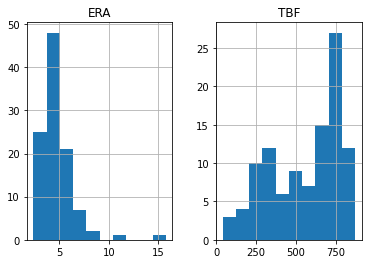

In [17]:
player_data_kbo[['ERA','TBF']].hist()
print(player_data_kbo[['ERA','TBF']].describe())

              ERA         TBF
count  205.000000  205.000000
mean     5.750585  193.160976
std      3.404285  186.000312
min      0.000000    4.000000
25%      4.050000   57.000000
50%      5.200000  126.000000
75%      6.750000  263.000000
max     27.000000  827.000000


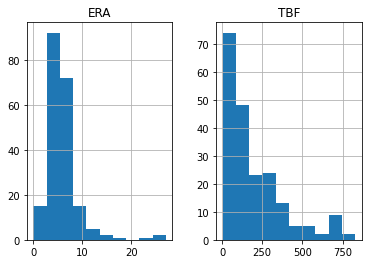

In [18]:
player_data_kbo_in_MLB[['ERA','TBF']].hist()
print(player_data_kbo_in_MLB[['ERA','TBF']].describe())

In [19]:
m_mean = (player_data_kbo_in_MLB.groupby('pitcher_name')['ERA'].
         mean().
         reset_index().
         rename(columns={'ERA':'MLB_mean'}))
k_mean = (player_data_kbo.groupby('pitcher_name')['ERA'].
         mean().
         reset_index().
         rename(columns={'ERA':'KBO_mean'}))
df = pd.merge(m_mean, k_mean, how='inner', on='pitcher_name')

df.head()

,pitcher_name,MLB_mean,KBO_mean
0,니퍼트,4.290000,3.6875
1,다이아몬드,10.262500,4.4200
2,듀브론트,5.106667,4.9200
3,레나도,7.306667,6.8000
4,레온,6.050000,11.2500


          MLB_mean  KBO_mean
MLB_mean  1.000000  0.107744
KBO_mean  0.107744  1.000000


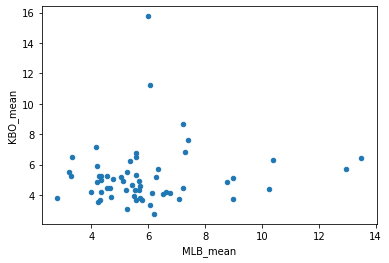

In [24]:
df.plot(kind='scatter', x='MLB_mean', y='KBO_mean')
print(df.corr()) # 두개의 상관계수가 작다(상관성이 적다)
# 상관성이 적은 이유는 투수의 소속팀에 따라 ERA가 영향받기 때문에 온전히 투수의 능력을 평가할 지표로 사용하기 어렵다

In [26]:
statcast_kbo=pd.read_csv("baseball_savant_foreigners_2011_2018.csv")
statcast_mlb_new=pd.read_csv("baseball_savant_foreigners_2019.csv")

print(statcast_kbo.shape)
print(statcast_mlb_new.shape)

(135753, 24)
(21903, 24)


In [27]:
print(statcast_kbo.columns)
print(statcast_mlb_new.columns)

Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')
Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')


In [28]:
statcast_kbo[['events','description','pitch_name']]

,events,description,pitch_name
0,field_out,hit_into_play,4-Seam Fastball
1,home_run,hit_into_play_score,4-Seam Fastball
2,NaN,foul,4-Seam Fastball
3,NaN,blocked_ball,4-Seam Fastball
4,NaN,ball,4-Seam Fastball
...,...,...,...
135748,NaN,ball,4-Seam Fastball
135749,field_out,hit_into_play,Cutter
135750,NaN,called_strike,Cutter
135751,NaN,ball,4-Seam Fastball


<AxesSubplot:>

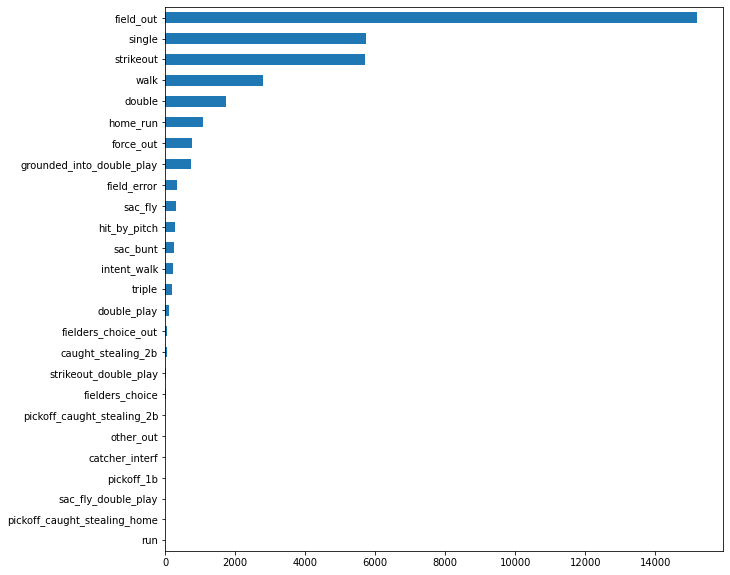

In [34]:
(statcast_kbo['events'].
value_counts().
sort_values(ascending=True).
plot(kind='barh',figsize=(10,10)))

<AxesSubplot:>

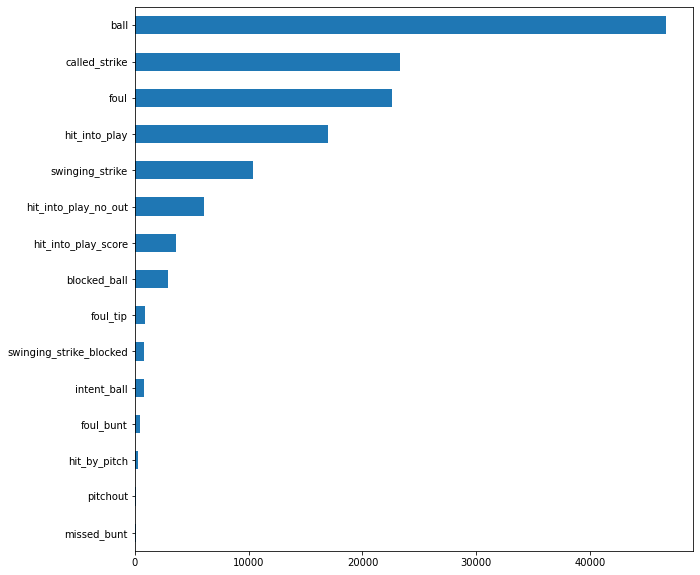

In [36]:
(statcast_kbo['description'].
value_counts().
sort_values(ascending=True).
plot(kind='barh',figsize=(10,10)))

<AxesSubplot:>

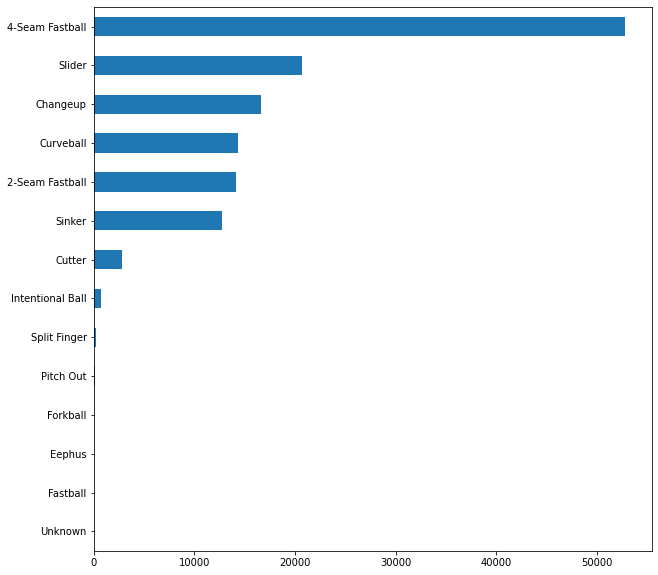

In [37]:
(statcast_kbo['pitch_name'].
value_counts().
sort_values(ascending=True).
plot(kind='barh',figsize=(10,10)))